In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"D:\udemy\Ml\data\password_resources\password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [6]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [7]:
data.drop(["index"], axis=1, inplace=True)
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [10]:
data.dtypes

password    object
strength     int64
dtype: object

In [11]:
data["strength"].unique()

array([1, 2, 0])

In [12]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [13]:
data[data['password'].str.isnumeric()].shape

(26, 2)

# Semantic Analysis of password

In [14]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [15]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [16]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [17]:
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [18]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [19]:
import string

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass
            

In [22]:
data['password'].apply(find_semantics) == 1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [23]:
data[data['password'].apply(find_semantics) == 1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


# Feature Engineering 
Applying some technique on features you have to prepare to feed on machine learing model

In [24]:
data["password"][0]

'zxe870819'

In [25]:
data['length'] = data['password'].str.len()

In [26]:
password = "Shan99"

In [27]:
len([char for char in password if char.islower()])/len(password)

0.5

In [28]:
def freq_lowercase(row):
    return len([char for char in password if row.islower()])/len(row)

In [29]:
def freq_uppercase(row):
    return len([char for char in password if char.isupper()])/len(password)

In [30]:
def freq_numerical_case(row):
    return len([char for char in password if char.isdigit()])/len(password)

In [31]:
data["lowercase_freq"] = np.round(data['password'].apply(freq_lowercase), 3)
data["uppercase_freq"] = np.round(data['password'].apply(freq_uppercase), 3)
data["digit_freq"] = np.round(data['password'].apply(freq_numerical_case), 3)

In [32]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.667,0.167,0.333
1,xw46454nr23l,1,12,0.500,0.167,0.333
2,soporte13,1,9,0.667,0.167,0.333
3,accounts6000webhost.com,2,23,0.261,0.167,0.333
4,c443balg,1,8,0.750,0.167,0.333


In [33]:
def freq_special_char(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)
            
            
            

In [34]:
data["special_char_freq"] = np.round(data['password'].apply(freq_special_char), 3)

In [35]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.667,0.167,0.333,0
1,xw46454nr23l,1,12,0.500,0.167,0.333,0
2,soporte13,1,9,0.667,0.167,0.333,0
3,accounts6000webhost.com,2,23,0.261,0.167,0.333,1
4,c443balg,1,8,0.750,0.167,0.333,0


In [36]:
data["special_char_freq"] = data["special_char_freq"]/data['length']

In [37]:
data[data['lowercase_freq'] == 2]

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
11555,mhe,0,3,2.0,0.167,0.333,0.000000
67886,mh,0,3,2.0,0.167,0.333,0.333333


In [38]:
data[['length', 'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [39]:
cols = ['length', 'lowercase_freq', 'uppercase_freq', 'digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col, 'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  2.000  0.896136  0.857
1                   0.0  0.750  0.623397  0.667
2                   0.0  0.429  0.029227  0.000


uppercase_freq
         uppercase_freq                     
                    min    max   mean median
strength                                    
0                 0.167  0.167  0.167  0.167
1                 0.167  0.167  0.167  0.167
2                 0.167  0.167  0.167  0.167


digit_freq
         digit_freq                     
                min    max   mean median
strength                                
0             0.333  0.333  0.3

In [40]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

C:\Users\iamma\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\iamma\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\iamma\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\iamma\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:64

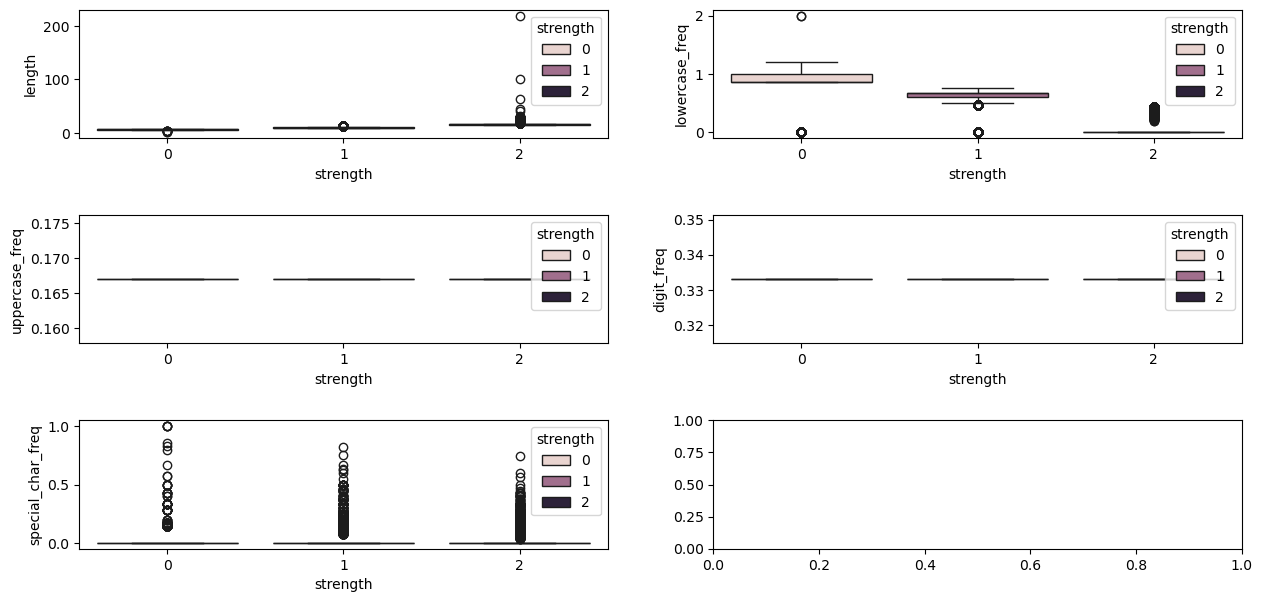

In [41]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(15,7))
sns.boxplot(x="strength", y="length", hue="strength", ax=ax1, data=data)
sns.boxplot(x="strength", y="lowercase_freq", hue="strength", ax=ax2, data=data)
sns.boxplot(x="strength", y="uppercase_freq", hue="strength", ax=ax3, data=data)
sns.boxplot(x="strength", y="digit_freq", hue="strength", ax=ax4, data=data)
sns.boxplot(x="strength", y="special_char_freq", hue="strength", ax=ax5,data=data)
plt.subplots_adjust(hspace=0.6)

# Feature Importance
univariate analysis

In [42]:
def get_dist(data, feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x='strength', y=feature, data=data)
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength'] == 0][feature], color="red", label="0", hist=False)
    sns.distplot(data[data['strength'] == 1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength'] == 2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [43]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

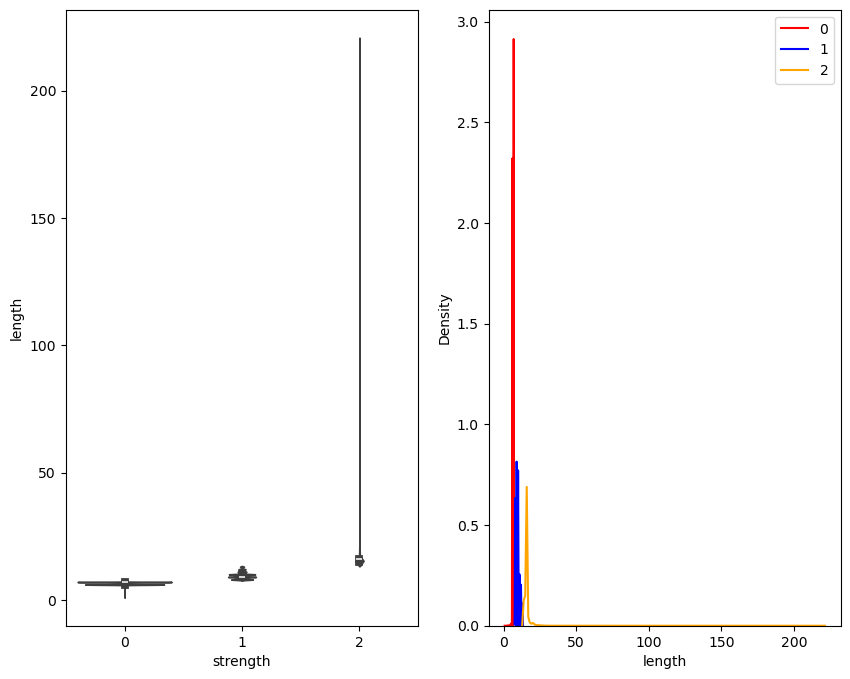

In [44]:
get_dist(data, 'length')

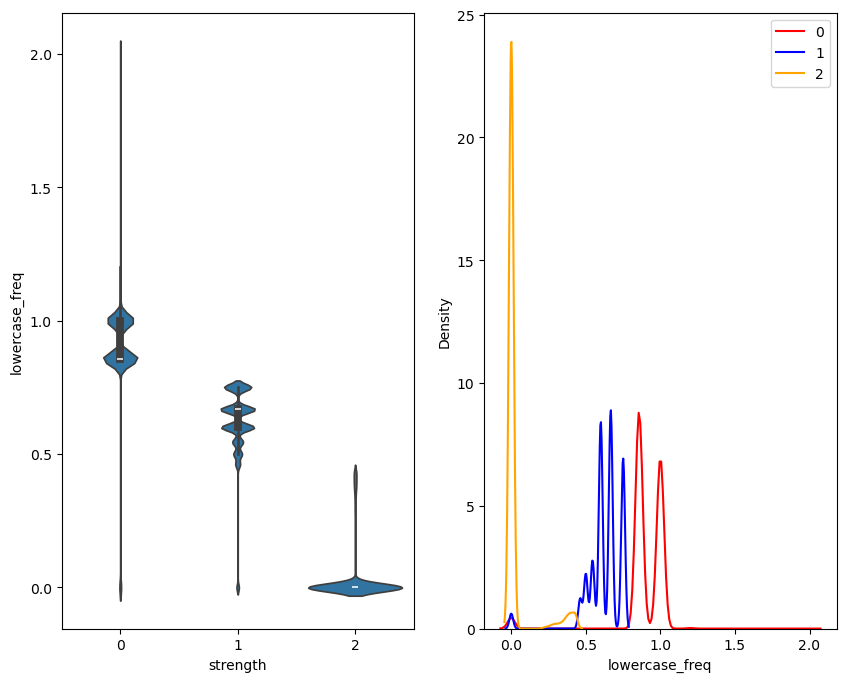

In [45]:
get_dist(data, 'lowercase_freq')

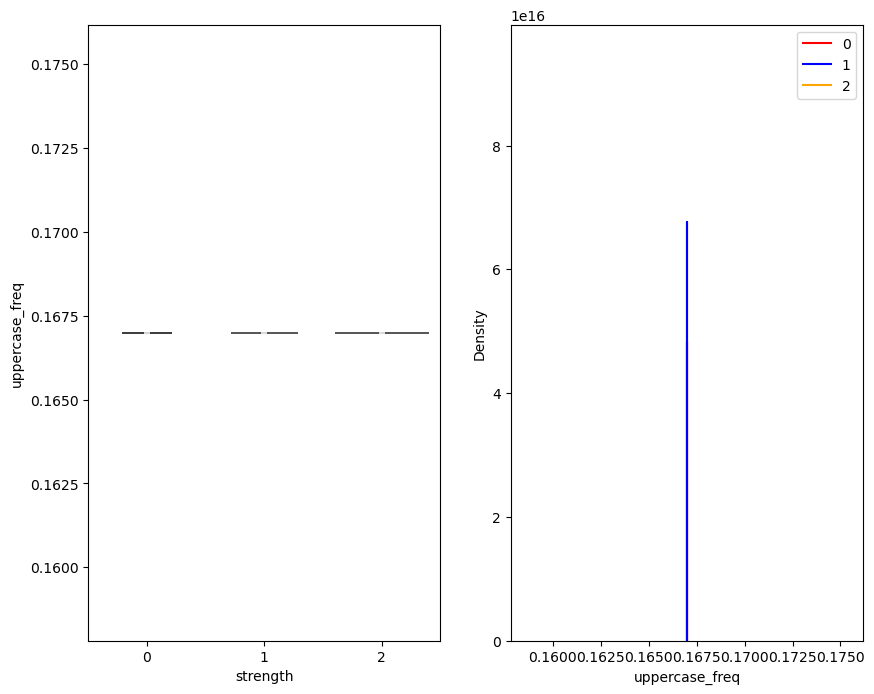

In [46]:
get_dist(data, 'uppercase_freq')

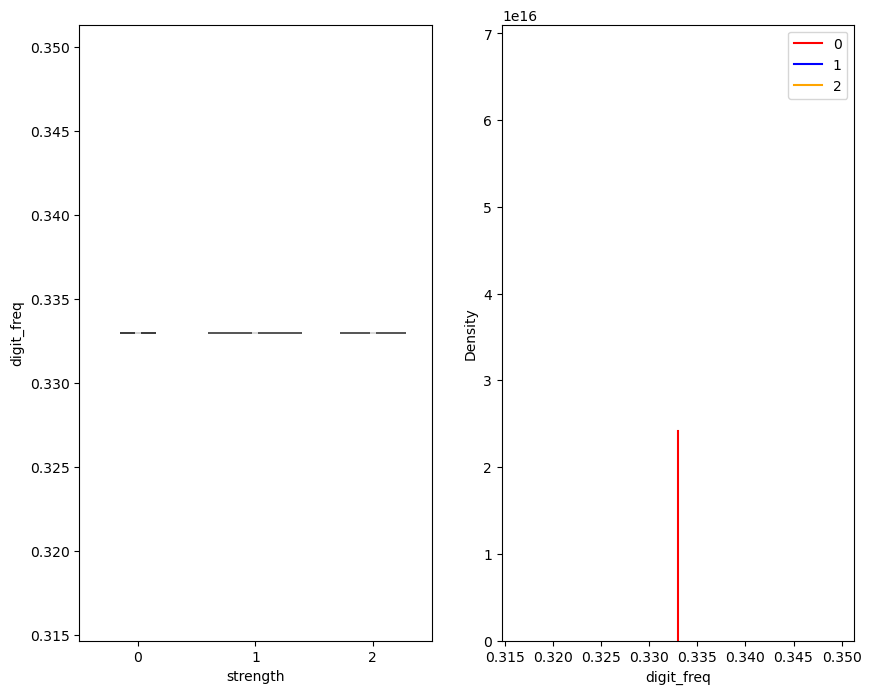

In [47]:
get_dist(data, 'digit_freq')

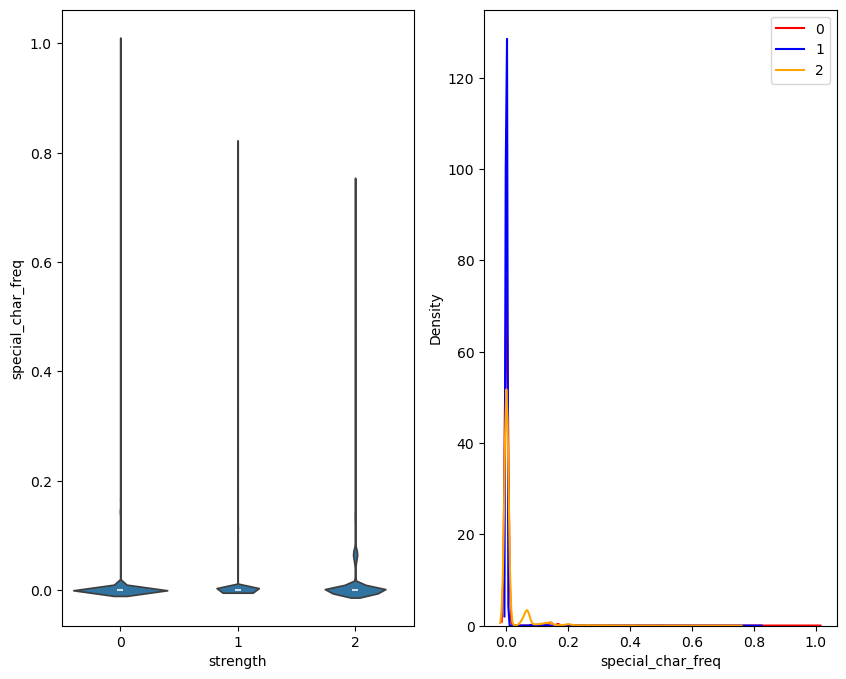

In [48]:
get_dist(data, 'special_char_freq')

In [49]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.667,0.167,0.333,0.000000
1,xw46454nr23l,1,12,0.500,0.167,0.333,0.000000
2,soporte13,1,9,0.667,0.167,0.333,0.000000
3,accounts6000webhost.com,2,23,0.261,0.167,0.333,0.043478
4,c443balg,1,8,0.750,0.167,0.333,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.600,0.167,0.333,0.000000
99996,fmiopvxb64,1,10,0.600,0.167,0.333,0.000000
99997,czvrbun38,1,9,0.667,0.167,0.333,0.000000
99998,mymyxe430,1,9,0.667,0.167,0.333,0.000000


In [50]:
dataframe = data.sample(frac=1)

In [51]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
8068,kuku13,0,6,1.000,0.167,0.333,0.0
1806,semp2015,1,8,0.750,0.167,0.333,0.0
74446,VSA1w5TgwNAoGEMv,2,16,0.000,0.167,0.333,0.0
21496,sk8erboy,1,8,0.750,0.167,0.333,0.0
43991,a3363214,1,8,0.750,0.167,0.333,0.0
...,...,...,...,...,...,...,...
85195,1989candan,1,10,0.600,0.167,0.333,0.0
99476,SraR6CDU0OQLkJ5V,2,16,0.000,0.167,0.333,0.0
34585,astory5,0,7,0.857,0.167,0.333,0.0
89969,poyrazli1928,1,12,0.500,0.167,0.333,0.0


# TFIDF

In [52]:
x = list(dataframe["password"])

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
vectorizer = TfidfVectorizer(analyzer = "char")

In [55]:
X = vectorizer.fit_transform(x)

In [56]:
X.shape

(100000, 99)

In [57]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(100000, 99))

In [58]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.22782071, 0.        , 0.29520796, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.67947658, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.63187148, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [59]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [60]:
df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [61]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df2['length'] = dataframe['length']
df2['lowercase_freq'] = dataframe['lowercase_freq']

In [63]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.261
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.600
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.600
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [64]:
y = dataframe['strength']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression                               

In [68]:
clf = LogisticRegression(multi_class="multinomial")

In [69]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [70]:
y_pred = clf.predict(X_test)

In [71]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], shape=(20000,))

In [72]:
from collections import Counter

In [73]:
Counter(y_pred)

Counter({np.int64(1): 16790, np.int64(2): 1872, np.int64(0): 1338})

In [74]:
password = '@23abcat'


In [75]:
sample_array = np.array([password])

In [76]:
sample_matrix = vectorizer.transform(sample_array)

In [77]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23129882, 0.25905569, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.67931151, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.38506206, 0.32275501, 0.30156467,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.27302388, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [78]:
sample_matrix.toarray().shape

(1, 99)

In [79]:
password

'@23abcat'

In [80]:
len(password)

8

In [81]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'a', 't']

In [82]:
len([char for char in password if char.islower()])/len(password)

0.625

In [83]:
np.append(sample_matrix.toarray(), (8, 0.44))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.23129882, 0.25905569, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.67931151, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.38506206, 0.32275501, 0.30156467,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.27302388, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
np.append(sample_matrix.toarray(), (8, 0.44)).shape

(101,)

In [85]:
np.append(sample_matrix.toarray(), (8, 0.44)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23129882, 0.25905569, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.67931151, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.38506206, 0.32275501, 0.30156467,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.27302388, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [86]:
new_matrix = np.append(sample_matrix.toarray(), (8, 0.44)).reshape(1,101)

In [87]:
clf.predict(new_matrix)

array([2])

In [88]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    length_password = len(password)
    length_normalize_lowercase = len([char for char in password if char.islower()])/len(password)
    matrix = np.append(sample_matrix.toarray(), (length_password, length_normalize_lowercase)).reshape(1,101)
    result = clf.predict(matrix)
    if result == 0:
        return "Passowrd is weak"
    elif result == 1:
        return "Password is normal"
    else:
        return "Password is strong"

In [89]:
predict()

Enter a password :  sdfjksldf


'Passowrd is weak'

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [92]:
accuracy_score(y_test, y_pred)

0.807

In [93]:
confusion_matrix(y_test, y_pred)

array([[  728,  1995,     0],
       [  557, 13853,   313],
       [   53,   942,  1559]])

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.27      0.36      2723
           1       0.83      0.94      0.88     14723
           2       0.83      0.61      0.70      2554

    accuracy                           0.81     20000
   macro avg       0.73      0.61      0.65     20000
weighted avg       0.79      0.81      0.79     20000

